Here, I want to know, if multiple droughts have bigger impact and lead to less recovery than just one drought event.

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X7_multiple_droughts/results/trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X7_multiple_droughts/results/trajectory'
    
data = pd.read_pickle(location)
#data = np.load(location)

def plot_figure(ax, d, r, k, obs, d_start):
    ax.set_title('{}) d_length = {}, r_trade = {}'.format(k, d, r))
    dt = data['<mean_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity')
    de = data['<sigma_trajectories>'].xs(level=('d_length', 'r_trade', 'observables'), key=(d, r, obs)).unstack('d_severity')
    dt.plot(ax=ax)
    for d_sev in de.columns.values:
        dtt = de.index.values
        ddt = dt[d_sev].values
        dde = de[d_sev].values
        plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

    ax.set_ylabel(obs)
    ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')

data.index.levels

Populating the interactive namespace from numpy and matplotlib


FrozenList([[0.0, 20.0, 40.0, 60.0], [6000, 8000, 10000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['MAP', 'built trade links', 'es_income_agricultural_productivity', 'es_income_forest', 'es_income_pop_density', 'es_income_precipitation', 'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells', 'forest_state_3_cells', 'killed settlements', 'lost trade links', 'max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradation', 'mean_waterflow', 'new settlements', 'time', 'total_agriculture_cells', 'total_cells_in_influence', 'total_income_agriculture', 

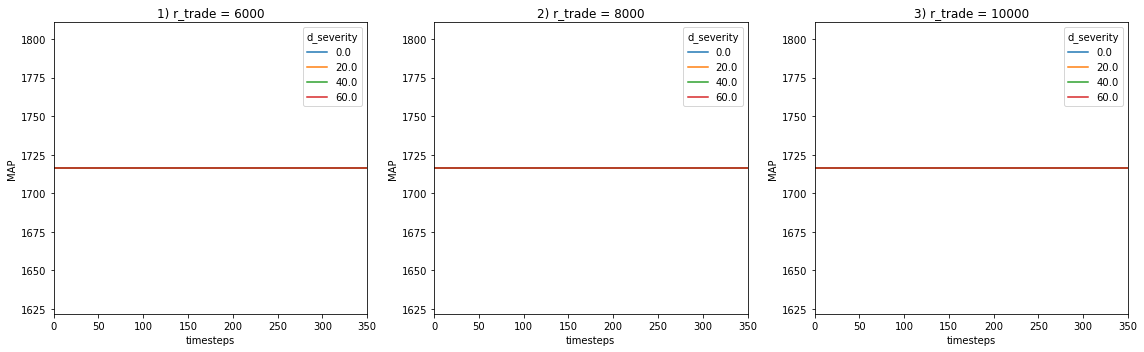

In [11]:
pylab.rcParams['figure.figsize'] = (16, 5)

d_lengths = data.index.levels[0].values
r_trades = data.index.levels[1].values

fig = plt.figure()
k = 0
plots = []
for j, r in enumerate(r_trades):
    k += 1
    ax = fig.add_subplot(1, len(r_trades), j + 1)
    obs = 'MAP'
    ax.set_title('{}) r_trade = {}'.format(k, r))
    dt = data['<mean_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs)).unstack('d_severity')
    #de = data['<sigma_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs)).unstack('d_severity')
    dt.plot(ax=ax)
    #for d_sev in de.columns.values:
    #    dtt = de.index.values
    #    ddt = dt[d_sev].values
    #    dde = de[d_sev].values
    #    plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

    ax.set_ylabel(obs)
    #ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')
    plots.append((r, k, obs))
fig.tight_layout()